In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Text(0.5, 0, 'Age')

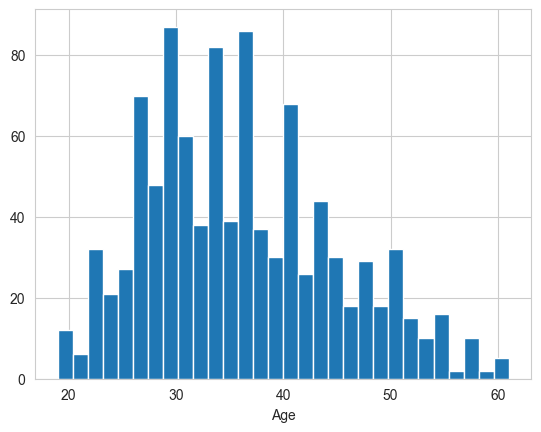

In [4]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

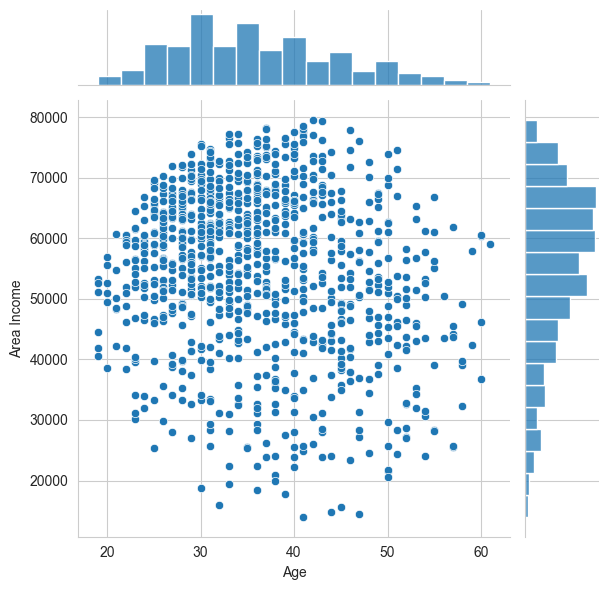

In [5]:
sns.jointplot(x='Age',y='Area Income',data=df)

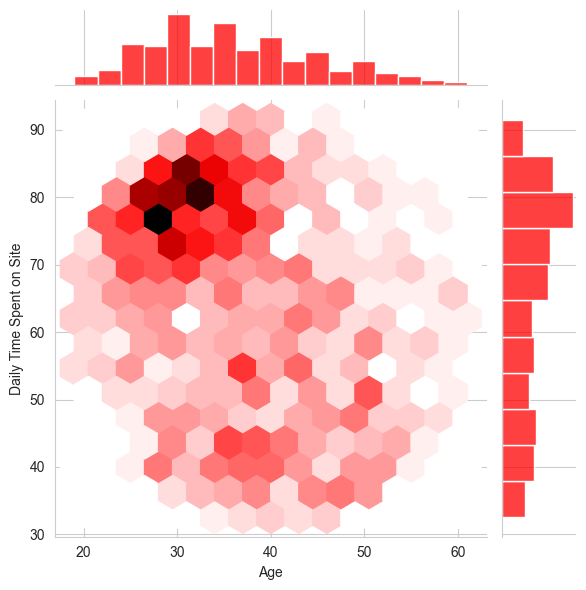

In [6]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red', kind="hex");

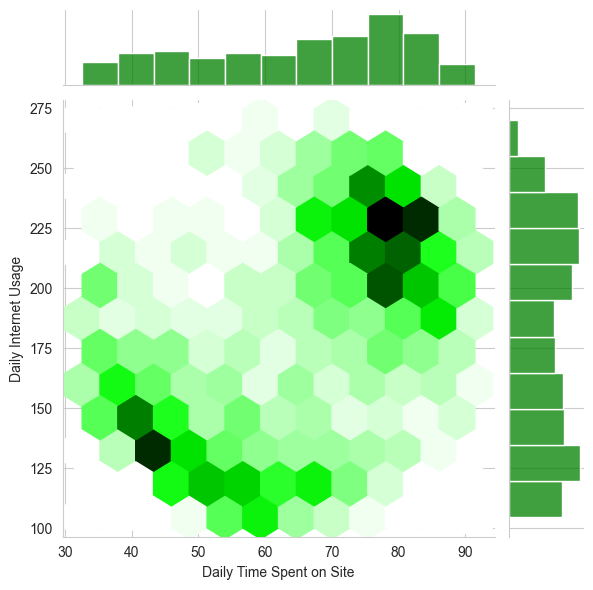

In [7]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green',kind="hex")

In [8]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [11]:
from sklearn.neighbors import KNeighborsClassifier
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(X_train, y_train)
pred_n3 = n3.predict(X_test)
print(classification_report(y_test, pred_n3))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67        89
           1       0.75      0.63      0.69       111

    accuracy                           0.68       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.69      0.68      0.68       200



In [12]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(X_train, y_train)
pred_n5 = n5.predict(X_test)
print(classification_report(y_test, pred_n5))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67        89
           1       0.76      0.61      0.68       111

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.69      0.68      0.68       200



In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.95      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        89
           1       0.92      0.93      0.92       111

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200

